In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "content/gdrive/MyDrive/Kaggle_Assesment"

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle_Assesment

/content/gdrive/MyDrive/Kaggle_Assesment


In [ ]:
pwd

'/content/gdrive/MyDrive/Kaggle_Assesment'

In [ ]:
!kaggle datasets download -d kylegraupe/skin-cancer-binary-classification-dataset

 80% 18.0M/22.5M [00:00<00:00, 89.9MB/s]
100% 22.5M/22.5M [00:00<00:00, 88.0MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  skin-cancer-binary-classification-dataset.zip
replace Skin_Data/Cancer/Testing/1714-02.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

content  Skin_Data


In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 43.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
import os
import time
import shutil
import pathlib
import itertools

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization)
from tensorflow.keras import regularizers

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print ('modules loaded')

modules loaded


In [ ]:
data_dir = '/content/gdrive/My Drive/Kaggle_Assesment/Skin_Data'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

In [ ]:
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)


In [ ]:
df.head(5)

filepaths      labels
0  /content/gdrive/My Drive/Kaggle_Assesment/Skin...      Cancer
1  /content/gdrive/My Drive/Kaggle_Assesment/Skin...      Cancer
2  /content/gdrive/My Drive/Kaggle_Assesment/Skin...  Non_Cancer
3  /content/gdrive/My Drive/Kaggle_Assesment/Skin...  Non_Cancer

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('filepaths').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['labels'].value_counts()
    for x_label, grp in _df_2.groupby('filepaths')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filepaths')
plt.ylabel('labels')

In [ ]:
df.tail(5)

filepaths      labels
0  /content/gdrive/My Drive/Kaggle_Assesment/Skin...      Cancer
1  /content/gdrive/My Drive/Kaggle_Assesment/Skin...      Cancer
2  /content/gdrive/My Drive/Kaggle_Assesment/Skin...  Non_Cancer
3  /content/gdrive/My Drive/Kaggle_Assesment/Skin...  Non_Cancer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  4 non-null      object
 1   labels     4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


(<matplotlib.image.AxesImage at 0x78f706f79a20>,
 Text(0.5, 1.0, 'Original image\n Non-Cancer_Skin'))

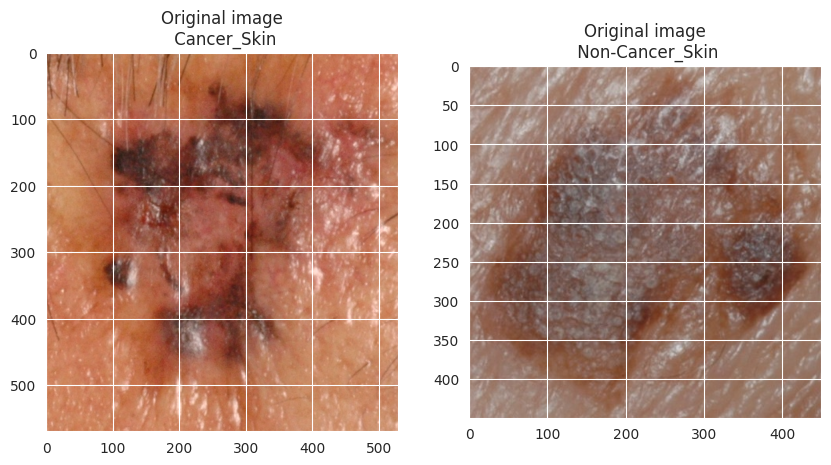

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path_1 ='/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1703.JPG'
img_1 = cv2.imread(img_path_1)
img_path_2 ='/content/gdrive/My Drive/Kaggle_Assesment/Skin_Data/Non_Cancer/Testing/2566-03.JPG'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Cancer_Skin')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Non-Cancer_Skin')

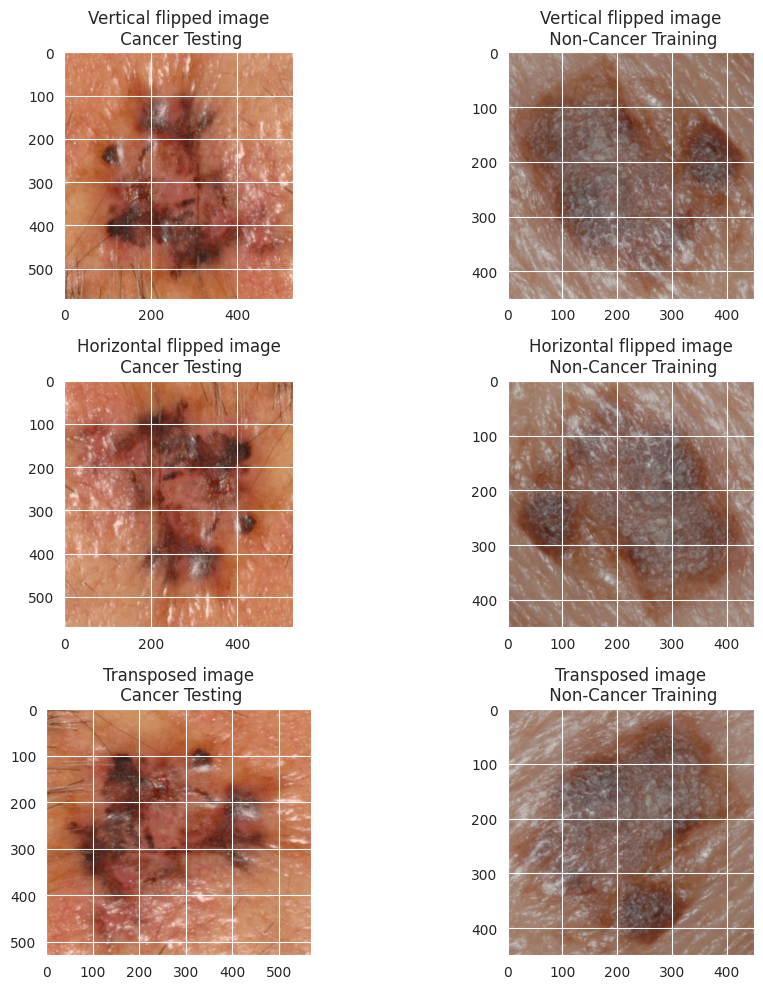

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path_1 ='/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1703.JPG'
img_1 = cv2.imread(img_path_1)
img_path_2 ='/content/gdrive/My Drive/Kaggle_Assesment/Skin_Data/Non_Cancer/Testing/2566-03.JPG'
img_2 = cv2.imread(img_path_2)

flip_img_v1=cv2.flip(img_1,0) # vertical flip
flip_img_v2=cv2.flip(img_2,0) # vertical flip
#horizontal flip
flip_img_h1=cv2.flip(img_1,1) # horizontal flip
flip_img_h2=cv2.flip(img_2,1) # horizontal flip
#transpose
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(cv2.cvtColor(flip_img_v1, cv2.COLOR_BGR2RGB)),plt.title('Vertical flipped image\n Cancer Testing')
plt.subplot(322)
plt.imshow(cv2.cvtColor(flip_img_v2, cv2.COLOR_BGR2RGB)),plt.title('Vertical flipped image\n Non-Cancer Training')
plt.subplot(323)
plt.imshow(cv2.cvtColor(flip_img_h1, cv2.COLOR_BGR2RGB)), plt.title('Horizontal flipped image\n Cancer Testing')
plt.subplot(324)
plt.imshow(cv2.cvtColor(flip_img_h2, cv2.COLOR_BGR2RGB)), plt.title('Horizontal flipped image\n Non-Cancer Training')
plt.subplot(325)
plt.imshow(cv2.cvtColor(transp_img_1, cv2.COLOR_BGR2RGB)),plt.title('Transposed image\n Cancer Testing')
plt.subplot(326)
plt.imshow(cv2.cvtColor(transp_img_2, cv2.COLOR_BGR2RGB)),plt.title('Transposed image\n Non-Cancer Training')
plt.tight_layout()
plt.show()

(<Axes: title={'center': 'Blurred image(d=6)\n Non-Cancer Testing'}>,
 Text(0.5, 1.0, 'Blurred image(d=6)\n Non-Cancer Testing'))

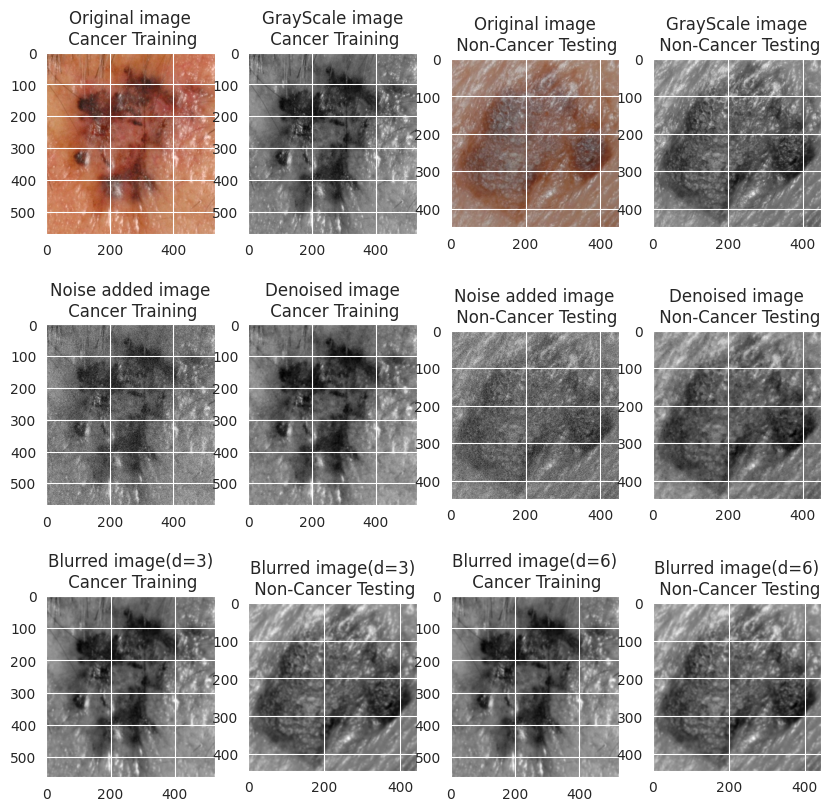

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline
img_path_1 ='/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1703.JPG'
img_1 = cv2.imread(img_path_1)
img_path_2 ='/content/gdrive/My Drive/Kaggle_Assesment/Skin_Data/Non_Cancer/Testing/2566-03.JPG'
img_2 = cv2.imread(img_path_2)
#gray scale conversion
img_1_gray = skic.rgb2gray(img_1)
img_2_gray = skic.rgb2gray(img_2)
# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)
img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)
#Noise reduction using Gaussian Blur
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -
1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -
1)[d:-d,d:-d]
img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -
1)[d:-d,d:-d]
img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -
1)[d:-d,d:-d]
plt.figure(figsize=(10,10))
#VisualisingGray scale images visualisation
plt.subplot(341), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Cancer Training')
plt.subplot(342), plt.imshow(img_1_gray, cmap = 'gray'),plt.title('GrayScale image\n Cancer Training')
plt.subplot(343), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Non-Cancer Testing')
plt.subplot(344), plt.imshow(img_2_gray, cmap = 'gray'),plt.title('GrayScale image\n Non-Cancer Testing')
#Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(img_1_n,cmap = 'gray'), plt.title('Noise added image\n Cancer Training')
plt.subplot(346), plt.imshow(img_1_d,cmap = 'gray'),plt.title('Denoised image\n Cancer Training')
plt.subplot(347), plt.imshow(img_2_n,cmap = 'gray'),plt.title('Noise added image\n Non-Cancer Testing')
plt.subplot(348), plt.imshow(img_2_d,cmap = 'gray'),plt.title('Denoised image\n Non-Cancer Testing')
#Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(img_1_blur3,cmap = 'gray'), plt.title('Blurred image(d=3)\n Cancer Training')
plt.subplot(3,4,10), plt.imshow(img_2_blur3,cmap ='gray'),plt.title('Blurred image(d=3)\n Non-Cancer Testing')
plt.subplot(3,4,11), plt.imshow(img_1_blur6,cmap ='gray'),plt.title('Blurred image(d=6)\n Cancer Training')
plt.subplot(3,4,12), plt.imshow(img_2_blur6,cmap ='gray'),plt.title('Blurred image(d=6)\n Non-Cancer Testing')

(<Axes: title={'center': 'Image with Corners\n Non-Cancer Testing'}>,
 Text(0.5, 1.0, 'Image with Corners\n Non-Cancer Testing'))

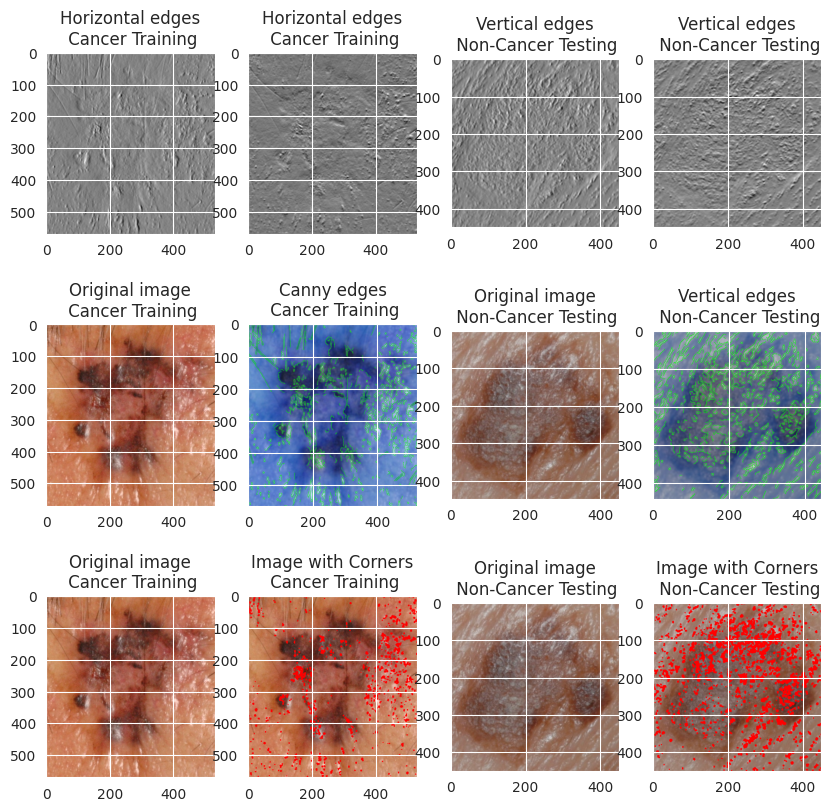

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline
img_path_1 ='/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1703.JPG'
img_1 = cv2.imread(img_path_1)
img_path_2 ='/content/gdrive/My Drive/Kaggle_Assesment/Skin_Data/Non_Cancer/Testing/2566-03.JPG'
img_2 = cv2.imread(img_path_2)
#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)
sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)
#Canny edge detector
#threshold selection
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green
edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)
edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)
#Corner detector
#detecting corners for image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05)
# parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]
#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3
# sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05)
# parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]

#Visualisng Edges and Corners
plt.figure(figsize=(10,10))
#Visualising Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap =
'gray'),plt.title('Horizontal edges\n Cancer Training')
plt.subplot(342), plt.imshow(sobely_img_1, cmap =
'gray'),plt.title('Horizontal edges\n Cancer Training')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap =
'gray'),plt.title('Vertical edges\n Non-Cancer Testing')
plt.subplot(344), plt.imshow(sobely_img_2, cmap =
'gray'),plt.title('Vertical edges\n Non-Cancer Testing')
#Visualising Canny Edges
plt.subplot(345), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Cancer Training')
plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n Cancer Training')
plt.subplot(347), plt.imshow(cv2.cvtColor(img_2,  cv2.COLOR_BGR2RGB)),plt.title('Original image\n Non-Cancer Testing')
plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Vertical edges\n Non-Cancer Testing')
#Visualising Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1,
cv2.COLOR_BGR2RGB)),plt.title('Original image\n Cancer Training')
plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1,
cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Cancer Training')
plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(img_2,
cv2.COLOR_BGR2RGB)),plt.title('Original image\n Non-Cancer Testing')
plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2,
cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Non-Cancer Testing')

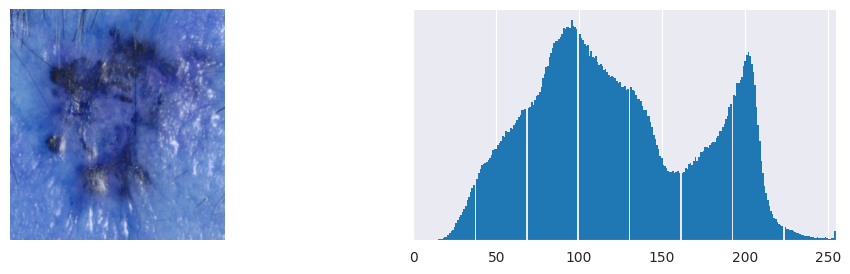

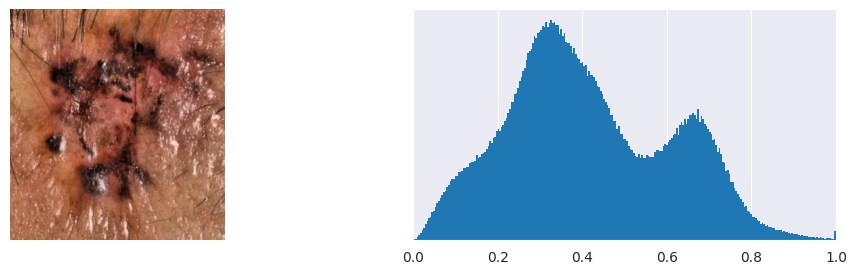

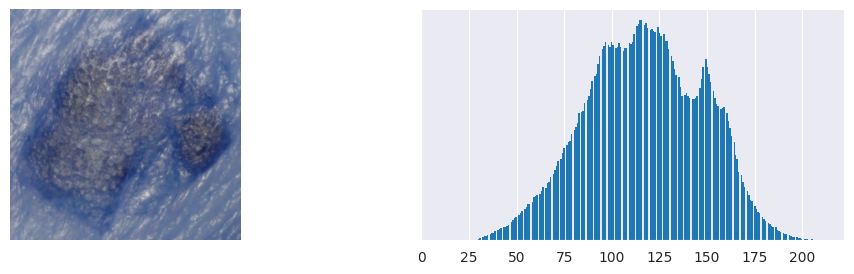

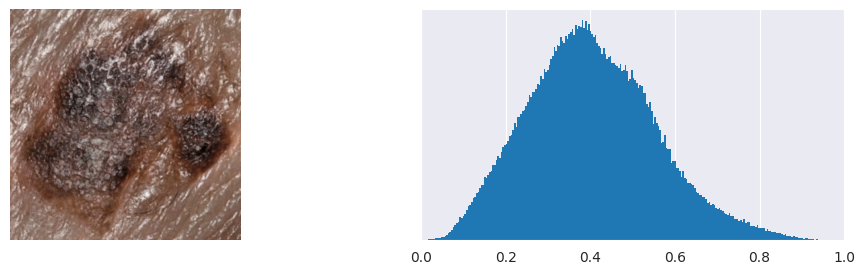

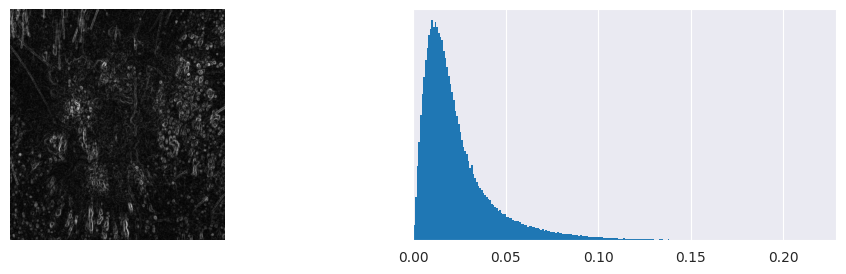

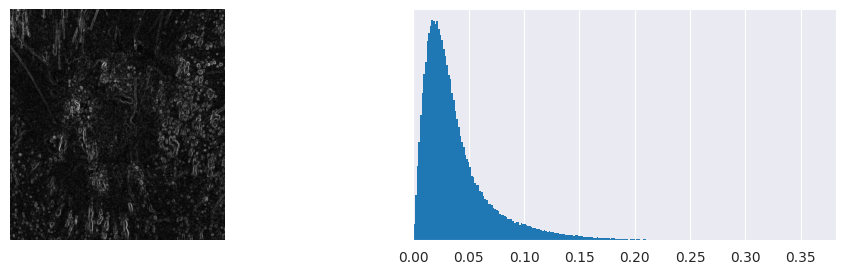

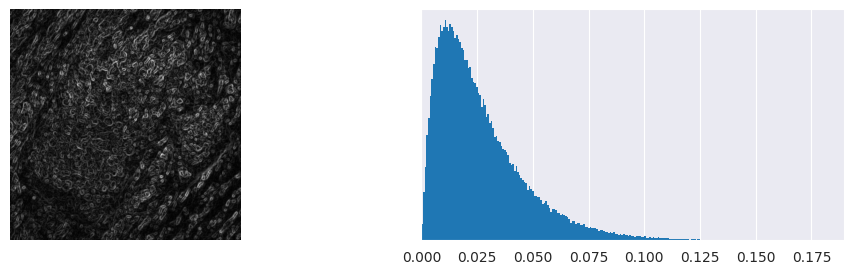

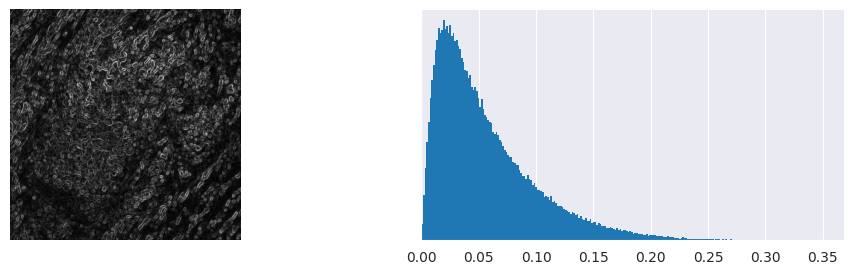

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline
img_path_1 ='/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1703.JPG'
img_1 = cv2.imread(img_path_1)
img_path_2 ='/content/gdrive/My Drive/Kaggle_Assesment/Skin_Data/Non_Cancer/Testing/2566-03.JPG'
img_2 = cv2.imread(img_path_2)
def show(img):
# Display the image.
  fig, (ax1, ax2) = plt.subplots(1, 2,
                                 figsize=(12, 3))
  ax1.imshow(img, cmap=plt.cm.gray)
  ax1.set_axis_off()
# Display the histogram.

  ax2.hist(img.ravel(), lw=0, bins=256)
  ax2.set_xlim(0, img.max())
  ax2.set_yticks([])
  plt.show()

show(img_1)
show(skie.equalize_adapthist(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)))

show(img_2)
show(skie.equalize_adapthist(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)))

#class 1 image
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)

#class 2 image
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)

In [ ]:
pip install cv2_plt_imshow

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/gdrive/MyDrive/Kaggle_Assesment/content/gdrive/MyDrive/Kaggle_Assesment/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/gdrive/MyDrive/Kaggle_Assesment/content/gdrive/MyDrive/Kaggle_Assesment/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1157-01.JPG").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Cancer:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 1s/step
Cancer: Class 1
Confidence Score: 0.99980074


<dtype: 'uint8'>


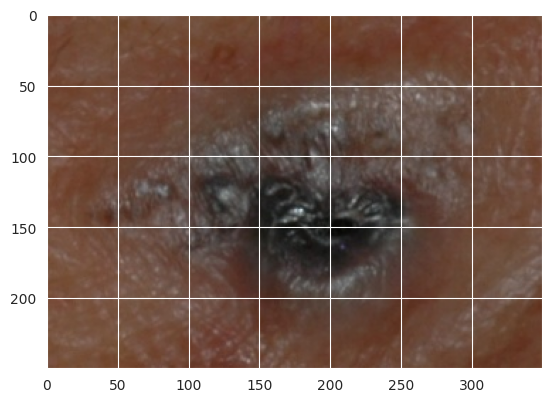

In [ ]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt
filterwarnings("ignore")
tf_img = io.read_file("/content/gdrive/MyDrive/Kaggle_Assesment/Skin_Data/Cancer/Training/1157-01.JPG")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)
# plt.show()
